In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['gender_submission.csv', 'test.csv', 'train.csv']


In [2]:
# Load Data
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
# Concatenate train & test
train_objs_num = len(train)
y = train['Survived']
dataset = pd.concat(objs=[train.drop(columns=['Survived']), test], axis=0)


In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn import linear_model 
from sklearn import preprocessing

In [5]:
from sklearn.model_selection import train_test_split
import seaborn as sns

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost

In [7]:
print("Training Dataset:", train.shape)
print("Testing Dataset:", test.shape)

Training Dataset: (891, 12)
Testing Dataset: (418, 11)


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000


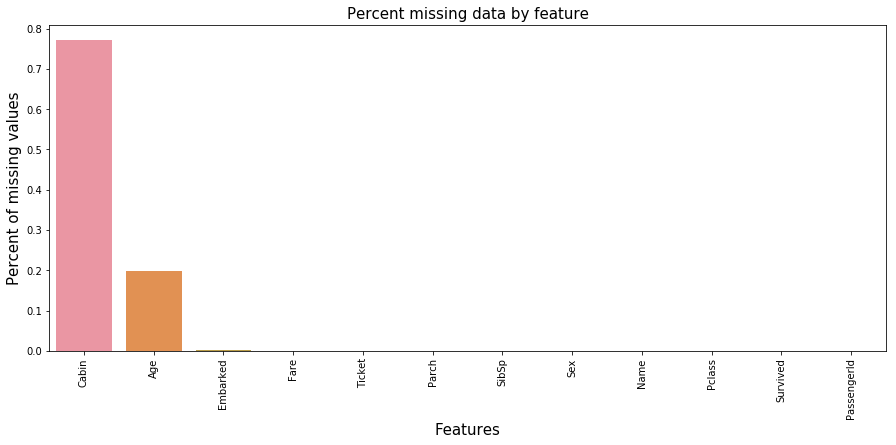

In [12]:
#Show Missing Features in training Dataset
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
Embarked,0,0.000000
Ticket,0,0.000000


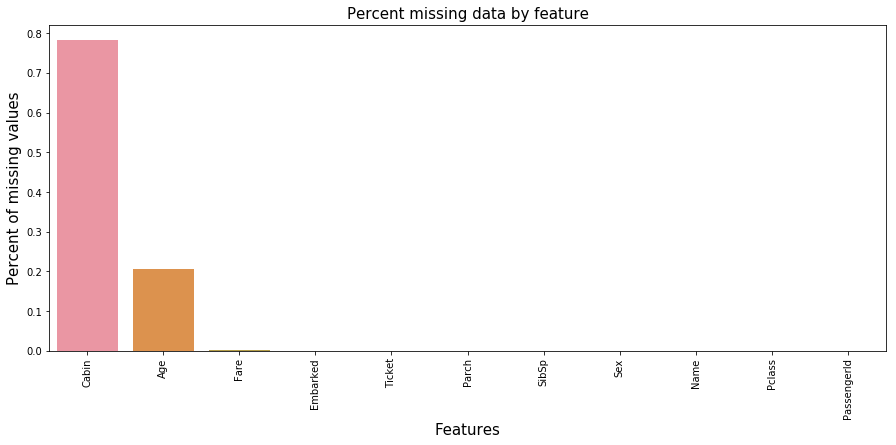

In [13]:
#Show Missing Features in testing Dataset
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [14]:
#Back-fill or forward-fill to propagate next or previous values respectively
#Here I have implemented back-fill
train.fillna(method='bfill',inplace=True)
test.fillna(method='bfill', inplace=True)

In [15]:
train.Embarked.fillna(-99,inplace=True)
test.Embarked.fillna(-99, inplace=True)

In [16]:
#Randomly fill the missing values with values close to the mean value but within one standard deviation
#Age in training dataset
Column_Name_avg = train['Age'].mean()
Column_Name_std = train['Age'].std()
Column_Name_null_count = train['Age'].isnull().sum()
Column_Name_null_random_list = np.random.randint(Column_Name_avg - Column_Name_std, Column_Name_avg + Column_Name_std, size=Column_Name_null_count)
train['Age'][np.isnan(train['Age'])] = Column_Name_null_random_list
train['Age'] = train['Age'].astype(int)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [17]:
#Randomly fill the missing values with values close to the mean value but within one standard deviation
#Age in testing dataset
Column_Name_avg = test['Age'].mean()
Column_Name_std = test['Age'].std()
Column_Name_null_count = test['Age'].isnull().sum()
Column_Name_null_random_list = np.random.randint(Column_Name_avg - Column_Name_std, Column_Name_avg + Column_Name_std, size=Column_Name_null_count)
test['Age'][np.isnan(test['Age'])] = Column_Name_null_random_list
test['Age'] = test['Age'].astype(int)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [18]:
#Drop Cabin because it contains lot of null values
train.dropna(axis=1,inplace=True)
test.dropna(axis=1, inplace=True)

In [19]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc923269668>]],
      dtype=object)

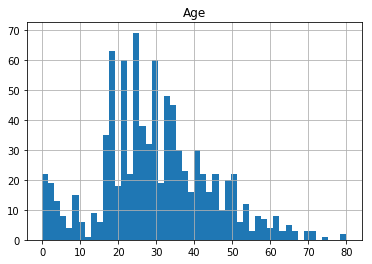

In [20]:
train.hist(column='Age', bins=50)

In [21]:
table = pd.pivot_table(data=train, values='PassengerId', index='Sex', columns='Survived', aggfunc='count')
print(table)

Survived    0    1
Sex               
female     81  233
male      468  109


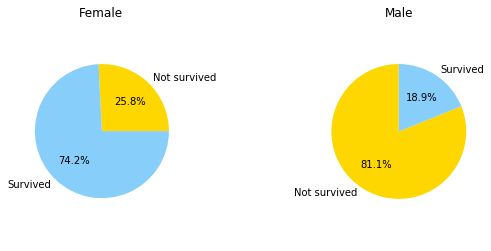

In [22]:
# Create the lists with survival values for each gender
pie_female = table.loc['female']
pie_male = table.loc['male']

# Create the figure with one row and two columns. Figsize will define the figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
# Create the pie chart on the first position with the given configurations
pie_1 = axes[0].pie(pie_female, labels=['Not survived','Survived'],
                    autopct='%1.1f%%', colors=['gold', 'lightskyblue'])
# Define this plot title
axes[0].set_title('Female')
# Make both axes equal, so that the chart is round
axes[0].axis('equal')
# Same as above, for the second pie chart
pie_2 = axes[1].pie(pie_male, labels=['Not survived','Survived'], 
                    autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue'])
axes[1].set_title('Male')
plt.axis('equal')
# Adjust the space between the two charts
plt.subplots_adjust(wspace=1)
plt.show()

In [23]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [24]:
train_X = train[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Embarked']].values
train_X[0:5]

array([[3, 22, 'male', 1, 0, 'S'],
       [1, 38, 'female', 1, 0, 'C'],
       [3, 26, 'female', 0, 0, 'S'],
       [1, 35, 'female', 1, 0, 'S'],
       [3, 35, 'male', 0, 0, 'S']], dtype=object)

In [25]:
train['Embarked'].value_counts()

S    645
C    169
Q     77
Name: Embarked, dtype: int64

In [26]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['male', 'female'])
train_X[:,2] = le_sex.transform(train_X[:,2]) 

le_embarked = preprocessing.LabelEncoder()
le_embarked.fit(['S', 'Q', 'C'])
train_X[:,5] = le_embarked.transform(train_X[:,5])

train_X[0:5]

array([[3, 22, 1, 1, 0, 2],
       [1, 38, 0, 1, 0, 0],
       [3, 26, 0, 0, 0, 2],
       [1, 35, 0, 1, 0, 2],
       [3, 35, 1, 0, 0, 2]], dtype=object)

In [27]:
test_X = test[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Embarked']].values
test_X[0:5]

array([[3, 34, 'male', 0, 0, 'Q'],
       [3, 47, 'female', 1, 0, 'S'],
       [2, 62, 'male', 0, 0, 'Q'],
       [3, 27, 'male', 0, 0, 'S'],
       [3, 22, 'female', 1, 1, 'S']], dtype=object)

In [28]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['male', 'female'])
test_X[:,2] = le_sex.transform(test_X[:,2]) 

le_embarked = preprocessing.LabelEncoder()
le_embarked.fit(['S', 'Q', 'C'])
test_X[:,5] = le_embarked.transform(test_X[:,5])

test_X[0:5]

array([[3, 34, 1, 0, 0, 1],
       [3, 47, 0, 1, 0, 2],
       [2, 62, 1, 0, 0, 1],
       [3, 27, 1, 0, 0, 2],
       [3, 22, 0, 1, 1, 2]], dtype=object)

In [29]:
train_y = train['Survived'].values
train_y[0:5]

array([0, 1, 1, 1, 0])

In [30]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(train_X, train_y, test_size=0.3, random_state=3)

In [31]:
print ("X Training Set: ", X_trainset.shape)
print ("Y Training Set:", y_trainset.shape)

X Training Set:  (623, 6)
Y Training Set: (623,)


In [32]:
print ("X Testing Set: ", X_testset.shape)
print ("Y Testing Set:", y_testset.shape)

X Testing Set:  (268, 6)
Y Testing Set: (268,)


In [33]:
model = xgboost.XGBClassifier()


In [34]:
#drugTree.fit(X_trainset,y_trainset)

model.fit(X_trainset, y_trainset)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [35]:
pred = model.predict(X_testset)

In [36]:
#print (predTree [0:5])
#print (y_testset [0:5])

print (pred [0:5])
print(y_testset[0:5])

[0 0 0 0 1]
[0 1 0 0 0]


In [37]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Accuracy: ", metrics.accuracy_score(y_testset, pred))

Accuracy:  0.7947761194029851


In [38]:
val_preds = model.predict(test_X)

In [39]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": val_preds
    })

submission.to_csv('submission.csv', index=False)

In [40]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
